In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('./Advertising.csv')

In [56]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [58]:
for column in df.columns:
    corr = np.corrcoef(df['sales'],df[column])
    print(f"Correlation between Sales and {column}={corr[0,1]}")

Correlation between Sales and TV=0.7822244248616061
Correlation between Sales and radio=0.5762225745710551
Correlation between Sales and newspaper=0.22829902637616528
Correlation between Sales and sales=0.9999999999999998


In [67]:
x = df.drop(['sales','newspaper'],axis=1)
y = df['sales']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=12345)
                                                 

In [69]:
len(x_train)

160

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_predictions = model.predict(x_test)
print(y_predictions)

[20.60406999 10.13700297 14.13521184  9.66887044  8.8019895  16.37089284
 20.25813534 12.68906669 23.0959979  21.26006806  9.82730482 18.0890302
  5.63434738 10.6337431  10.05066099 15.95048667 23.63991303 24.00327772
  7.26215954 12.04052676 13.06575744 17.55634807  6.40664076 18.42573733
 19.61632996 10.27080059  6.3318401  15.50645488  5.59139861 13.63205244
 17.00554842  6.80874878 10.03277263  8.60891578 13.74707973 10.64808576
 22.78118462  8.68338731 14.43411304 13.91446248]


Text(0.5, 1.0, 'radio Vs sales OBSERVED OUTPUT')

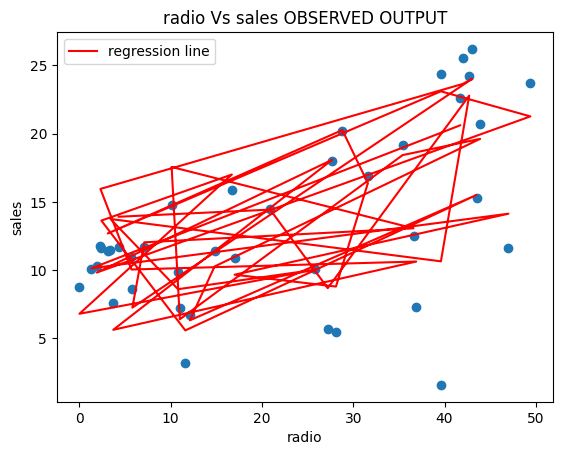

In [73]:
plt.scatter(x_test['radio'],y_test)
plt.plot(x_test['radio'],y_predictions,color='red',label="regression line")
plt.legend()
plt.xlabel('radio')
plt.ylabel('sales')
plt.title('radio Vs sales OBSERVED OUTPUT')

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,y_prediction)
MSE = mean_squared_error(y_test,y_prediction)
RMSE = np.sqrt(MSE)
print(f"Mean Absoulte Error = {MAE}")
print(f"Mean Sqaured Error = {MSE}")
print(f"Root Mean Squared Error ={RMSE}")

Mean Absoulte Error = 1.6795024935822132
Mean Sqaured Error = 5.4312755260781795
Root Mean Squared Error =2.330509713791852
